In [2]:
!pip install numpy pandas gensim


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import gensim
import os

In [5]:
!pip install nltk

  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.8 MB/s  0:00:00
Using cached click-8.3.1-py3-none-any.whl (108 kB)

   ---------------------------------------- 0/4 [regex]
   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
print(os.getcwd())
print(os.listdir())

e:\NLP-projects\word-to-vec
['.git', 'data', 'game_of_throne_word=to-vec.ipynb']


In [23]:
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []

for filename in os.listdir("data"):
    if filename.endswith(".txt"):
        f = open(os.path.join("data", filename), encoding="cp1252")
        corpus = f.read()
        f.close()

        raw_sent = sent_tokenize(corpus)

        for sent in raw_sent:
            story.append(simple_preprocess(sent))

print(len(story))

145020


Step 1: Train Word2Vec Model

In [24]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=story,
    vector_size=100,   # embedding size
    window=5,          # context window
    min_count=2,       # ignore rare words
    workers=4
)

print("Vocabulary size:", len(model.wv))

Vocabulary size: 17453


Step 2: Test the Model

In [25]:
model.wv.most_similar("king")

[('realm', 0.6693512797355652),
 ('baratheon', 0.6575314998626709),
 ('prince', 0.633115291595459),
 ('throne', 0.629647433757782),
 ('tourney', 0.6060582995414734),
 ('site', 0.595874547958374),
 ('battle', 0.594457745552063),
 ('feinting', 0.5920624136924744),
 ('usurper', 0.5827624201774597),
 ('ninth', 0.5822566747665405)]

In [26]:
model.wv.most_similar("winter")

[('summer', 0.762852132320404),
 ('autumn', 0.7188392281532288),
 ('dawn', 0.7031678557395935),
 ('tide', 0.701041579246521),
 ('woods', 0.7002037763595581),
 ('bleak', 0.6999660730361938),
 ('dusk', 0.6983226537704468),
 ('spring', 0.6966715455055237),
 ('ruins', 0.695866048336029),
 ('sun', 0.6926400661468506)]

Step 3: Word Analogy (Cool Part)

In [27]:
model.wv.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.6957240104675293),
 ('feinting', 0.5825493931770325),
 ('prince', 0.5799731016159058),
 ('targaryen', 0.5356780886650085),
 ('mother', 0.520768940448761),
 ('realm', 0.5199766159057617),
 ('daenerys', 0.5146805047988892),
 ('tourney', 0.5107553601264954),
 ('throne', 0.5093007683753967),
 ('vale', 0.5008839964866638)]

Step 4: Save Model

In [28]:
model.save("got_word2vec.model")

Load later with:

In [29]:
model = Word2Vec.load("got_word2vec.model")

Optional: Check Vocabulary Words

In [30]:
print(model.wv.index_to_key[:20])

['the', 'and', 'to', 'of', 'he', 'his', 'was', 'you', 'her', 'in', 'it', 'had', 'that', 'she', 'as', 'with', 'him', 'not', 'but', 'for']


In [31]:
model.build_vocab(story)

Train the model

In [32]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6569853, 8628190)

In [33]:
model.wv.most_similar('daenerys')

[('joffrey', 0.5775707960128784),
 ('rhaegar', 0.5741693377494812),
 ('viserys', 0.567685604095459),
 ('myrcella', 0.5656280517578125),
 ('unburnt', 0.5636316537857056),
 ('aerys', 0.5528666377067566),
 ('cersei', 0.5379618406295776),
 ('stormborn', 0.5250755548477173),
 ('arianne', 0.5194226503372192),
 ('selyse', 0.5026090741157532)]

In [34]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [35]:
model.wv['king']

array([-1.169886  ,  1.2903082 , -2.1028552 , -0.4464944 ,  0.4485406 ,
        0.7740147 ,  1.626622  ,  0.62364995, -1.7485039 , -0.6108269 ,
        0.99399376,  0.33406258,  0.11207831, -1.4458054 ,  0.23684229,
        4.225352  , -0.6419293 , -2.413796  , -0.43747142,  1.5469055 ,
       -1.7551107 , -0.9139389 , -0.7226938 ,  0.2979615 ,  2.0943828 ,
        0.41267955, -2.2706015 ,  0.4722595 , -0.09382014, -0.32386294,
        0.87856734, -1.3773228 ,  1.2059342 , -0.9407346 ,  0.05308731,
        0.25468677,  1.2114394 ,  1.6459755 , -0.49077195, -1.6302944 ,
        1.7848442 , -1.602954  , -0.7084243 , -4.2415633 , -1.0218527 ,
       -2.7685592 , -1.9533994 ,  0.3469507 , -0.14354247, -1.614931  ,
        1.2902339 ,  0.3491283 ,  0.81348413, -0.60993624,  1.7038733 ,
        0.41972685,  2.889109  , -0.30578274,  2.6656282 ,  1.5335454 ,
        0.76581967, -2.5060346 ,  0.5510882 ,  2.1506293 ,  0.10531895,
       -1.2636636 ,  1.2168062 ,  1.2353888 ,  0.56836194,  0.52

In [36]:
model.wv.similarity('arya','sansa')

np.float32(0.8383356)

In [37]:
model.wv.get_normed_vectors()

array([[-0.0993368 , -0.01785244, -0.06440728, ...,  0.04454463,
         0.00979861, -0.16763955],
       [ 0.20963565,  0.09235727,  0.09170087, ..., -0.16812402,
        -0.07624277, -0.12860739],
       [ 0.03145128, -0.02767485,  0.11083969, ..., -0.03831092,
         0.08071381,  0.20216322],
       ...,
       [-0.04127027, -0.00620581,  0.04889746, ..., -0.04893004,
        -0.08193385, -0.01507869],
       [ 0.09521924,  0.02646086,  0.09176693, ..., -0.01663946,
         0.01154924, -0.0075506 ],
       [ 0.05835078,  0.0782047 ,  0.09643422, ...,  0.05067644,
        -0.05560238,  0.06354404]], shape=(17453, 100), dtype=float32)

In [38]:
y = model.wv.index_to_key

In [40]:
!pip install matplotlib scikit-learn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 2.5 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.6 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.9 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.1 MB/s eta 0:00:01
   -----------------------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


It is 100 dimension so i will dimesional reduction using PCA in 3 dimensional

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=3)

In [43]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [44]:
X.shape

(17453, 3)

In [46]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.9 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.9 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.9 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.9 MB 1.7 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/9.9 MB 1.9 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.9 MB 2.1 MB/s eta 0:00:04
   ---------------- ----------------------- 4.2/9.9 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.9 MB 2.3 MB/s eta 0:00:03
   ----------------------- ------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
%pip install --upgrade "nbformat>=4.2.0"

  Using cached jsonschema-4.26.0-py3-none-any.whl.metadata (7.6 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.30.0-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
Using cached jsonschema-4.26.0-py3-none-any.whl (90 kB)
Using cached attrs-25.4.0-py3-none-any.whl (67 kB)
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Using cached referencing-0.37.0-py3-none-any.whl (26 kB)
Using cached rpds_py-0.30.0-cp311-cp311-win_amd64.whl (236 kB)

   ---------------------------------------- 0/7 [fastjsonschema]
   ---------------------------------------- 0/7 [fastjsonschema]
   ---------------------------------------- 0/7 [fastjsonschema]
   ----- ---------------------------------- 1/7 [rpds-py]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- -----------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from gensim.models import Word2Vec

# assuming you already have:
# model = Word2Vec(...)

# choose how many words to visualize
TOP_N = 200  

words = list(model.wv.index_to_key[:TOP_N])
X = model.wv[words]   # shape: (TOP_N, vector_size)

print("Matrix shape:", X.shape)

Matrix shape: (200, 100)


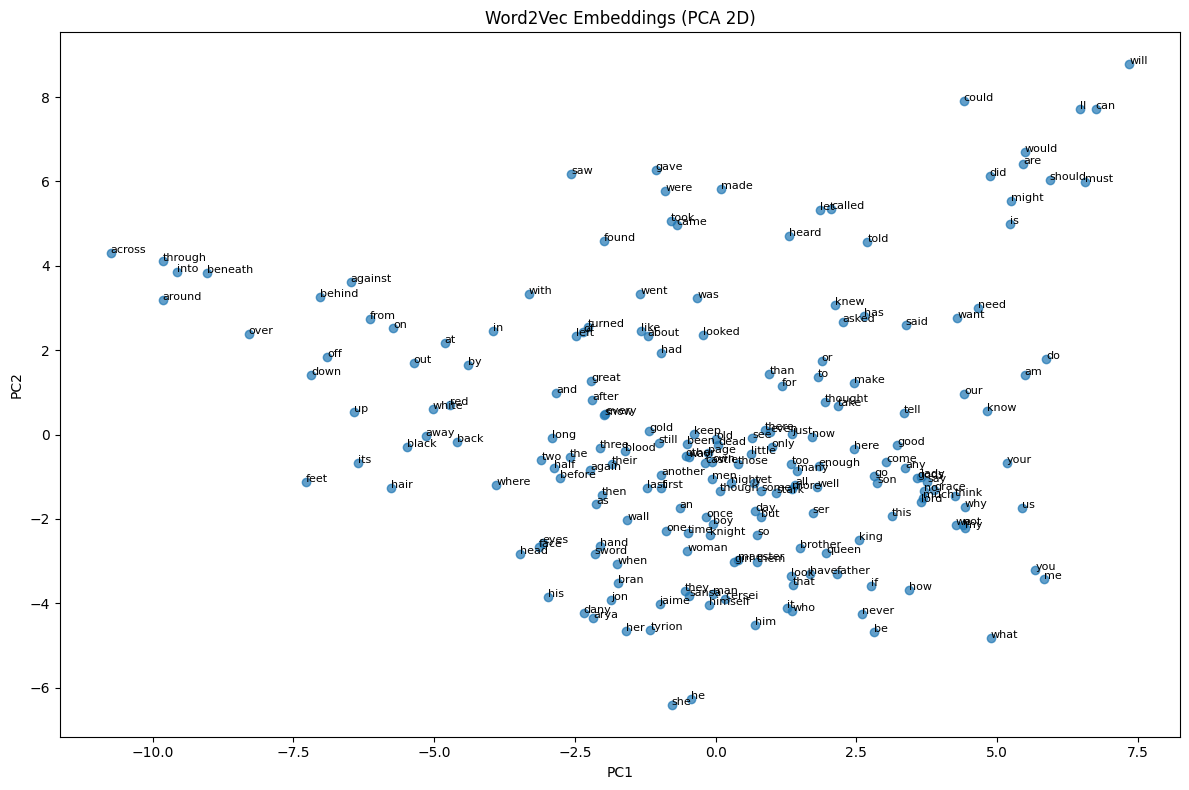

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

plt.title("Word2Vec Embeddings (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import plotly.express as px

# Create dataframe
df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "word": words
})

In [62]:
fig = px.scatter(
    df,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)"
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=700)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [63]:
import plotly.io as pio
pio.renderers.default = "browser"

In [64]:
fig.show()

In [66]:
TOP_N = 200

df_small = df.iloc[:TOP_N]

fig = px.scatter(
    df_small,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)"
)

fig.update_traces(marker=dict(size=6))
fig.show()

In [67]:
import plotly.express as px
import pandas as pd

# you already have: X_pca, words

df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "word": words,
})

# Optional: limit to top 200 words so it’s not too crowded
df_small = df.iloc[:200]

fig = px.scatter(
    df_small,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)",
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=700)

# 🚨 Instead of fig.show():
fig.write_html("word2vec_pca.html")
print("Saved to word2vec_pca.html")

Saved to word2vec_pca.html
